# Laboratorio 03: Raíces.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: José Nicolás Rodriguez Montoya
*Métodos computacionales 2025-I*

---

# 1

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación

$$M = E- e\sin(E)$$

siendo $M$ la anomalía media, $E$ la anomalía excéntrica y $e$ la excentricidad ($e= \sqrt{1-b/a}$) (con $a>b$ los semiejes). Los astrónomos definen las "anomalías"  como posiciones angulares: la anomalía media $M$ es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio

$$M= \frac{2\pi}{T} (t-t_0)$$

donde $T$ es el periodo orbital y $t_0$ el tiempo cuando el objeto está en el perihelio.

Para el cometa Halley $e=0.9672671$, $T=75.96000$ años y $t_0=1986.1113$ años (Febrero 9 de 1986).

* Encuentre $E$ para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de

$$f(E) = E - e\sin(E) - M$$

para $E\in [0,1]$.

* Grafique $E=E(t)$ para todo un periodo de revolución y resuelva usando el método de Newton y secante

$$E-e\sin(E) - M(t) = 0$$

con un paso de $\Delta t = T/100$. $t_i = t_0 + (i)*\Delta t$, comenzando en $E(t_0) = 0$

1 de abril de 1986 en año decimal: 1986.246575


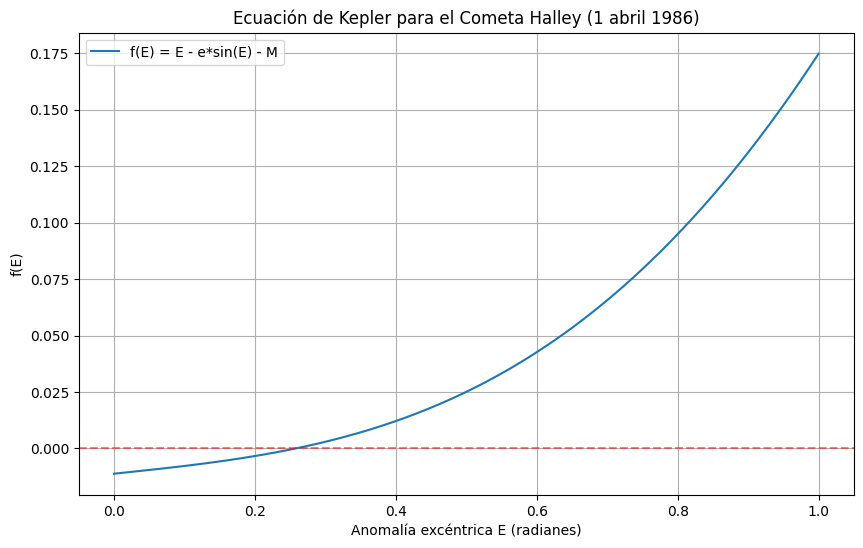

Solución para E el 1 de abril de 1986: 0.257770 radianes


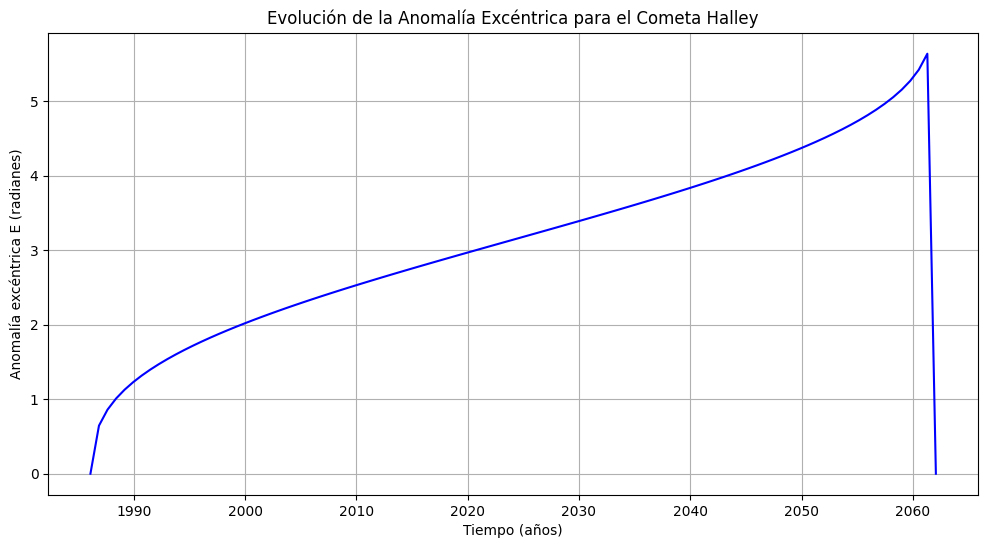

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# Parámetros del cometa Halley
e = 0.9672671  # Excentricidad
T = 75.96000   # Periodo orbital en años
t0 = 1986.1113 # Tiempo de paso por el perihelio (9 de febrero de 1986)

# 1. Solución para el 1 de abril de 1986 (1986.2479 en año decimal)
def fecha_a_anio_decimal(mes, dia, anio):
    """Convierte fecha a año decimal"""
    from datetime import datetime
    d = datetime(anio, mes, dia)
    start = datetime(anio, 1, 1)
    end = datetime(anio + 1, 1, 1)
    return anio + (d - start).total_seconds() / (end - start).total_seconds()

t_abril = fecha_a_anio_decimal(4, 1, 1986)
print(f"1 de abril de 1986 en año decimal: {t_abril:.6f}")

# Calculamos la anomalía media M
M = (2 * np.pi / T) * (t_abril - t0)

# Función de Kepler
def f(E):
    return E - e * np.sin(E) - M

# Graficamos f(E) en [0, 1]
E_vals = np.linspace(0, 1, 500)
f_vals = f(E_vals)

plt.figure(figsize=(10, 6))
plt.plot(E_vals, f_vals, label='f(E) = E - e*sin(E) - M')
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Anomalía excéntrica E (radianes)')
plt.ylabel('f(E)')
plt.title('Ecuación de Kepler para el Cometa Halley (1 abril 1986)')
plt.grid(True)
plt.legend()
plt.show()

# Resolvemos la ecuación usando el método de Newton
E_sol = newton(f, x0=0.5)  # Usamos 0.5 como valor inicial
print(f"Solución para E el 1 de abril de 1986: {E_sol:.6f} radianes")

# 2. Solución para todo un período orbital
def resolver_kepler(t, E_guess=0):
    """Resuelve la ecuación de Kepler para un tiempo t dado"""
    M_t = (2 * np.pi / T) * (t - t0) % (2 * np.pi)
    def f(E):
        return E - e * np.sin(E) - M_t
    return newton(f, E_guess)

# Generamos los tiempos para un período completo
n_points = 100
tiempos = np.linspace(t0, t0 + T, n_points)
E_vals = np.zeros_like(tiempos)

# Resolvemos secuencialmente, usando la solución anterior como guess
for i in range(len(tiempos)):
    if i == 0:
        E_vals[i] = 0  # En el perihelio E=0
    else:
        E_vals[i] = resolver_kepler(tiempos[i], E_vals[i-1])

# Graficamos E(t) para un período completo
plt.figure(figsize=(12, 6))
plt.plot(tiempos, E_vals, 'b-')
plt.xlabel('Tiempo (años)')
plt.ylabel('Anomalía excéntrica E (radianes)')
plt.title('Evolución de la Anomalía Excéntrica para el Cometa Halley')
plt.grid(True)
plt.show()

# 2
En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como:

$$
m(T) = \tanh\left( \frac{m(T)}{T} \right)
$$

donde $m$ y $T$ son la magnetizacion y temperatura reducida respectivamente


Para $T = 0.5$, determine:

- La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).

- Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).

Ahora, defina `T = np.linspace(0.1,0.99,100)`, y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.

Solución con Newton-Raphson para T=0.5: 0.9575
Solución con método de la secante para T=0.5: 0.9575
Solución con método de punto fijo para T=0.5: 0.9575


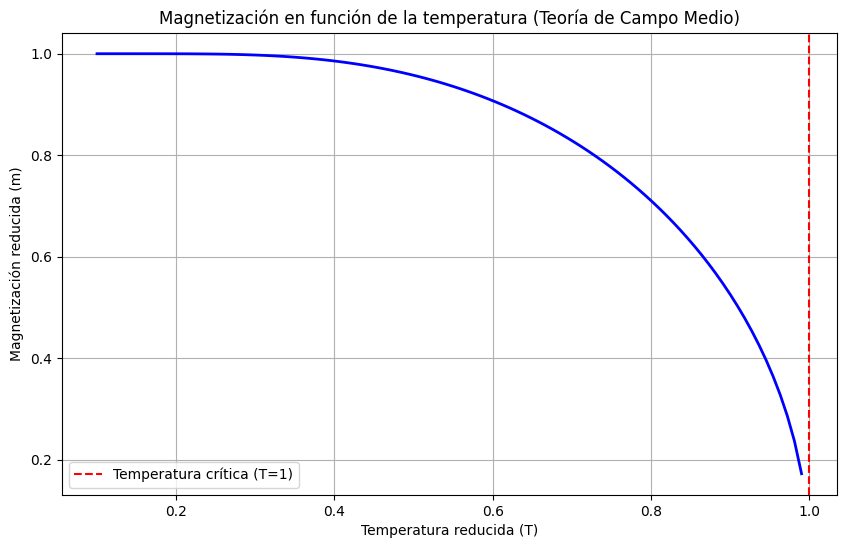

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

## Parte 1: Solución para T = 0.5

def ecuacion_magnetizacion(m, T):
    """Función que define la ecuación a resolver: m - tanh(m/T)"""
    return m - np.tanh(m / T)

def derivada_magnetizacion(m, T):
    """Derivada de la función para el método de Newton-Raphson"""
    return 1 - (1 / (np.cosh(m / T)**2) / T)

T_especifico = 0.5

# Método de Newton-Raphson
sol_newton = newton(ecuacion_magnetizacion, x0=0.8, fprime=derivada_magnetizacion, args=(T_especifico,))
print(f"Solución con Newton-Raphson para T={T_especifico}: {sol_newton:.4f}")

# Método de la secante (usamos newton sin derivada)
sol_secante = newton(ecuacion_magnetizacion, x0=0.7, x1=0.8, args=(T_especifico,))
print(f"Solución con método de la secante para T={T_especifico}: {sol_secante:.4f}")

# Método de punto fijo
def punto_fijo(T, m0=0.8, tol=1e-6, max_iter=100):
    """Implementación del método de punto fijo"""
    m = m0
    for i in range(max_iter):
        m_nuevo = np.tanh(m / T)
        if np.abs(m_nuevo - m) < tol:
            break
        m = m_nuevo
    return m

sol_punto_fijo = punto_fijo(T_especifico)
print(f"Solución con método de punto fijo para T={T_especifico}: {sol_punto_fijo:.4f}")

## Parte 2: Gráfico para un rango de temperaturas

T_vals = np.linspace(0.1, 0.99, 100)
m_vals = np.zeros_like(T_vals)

# Resolvemos para cada temperatura usando el método de la secante
for i, T in enumerate(T_vals):
    # Para T > 0.5 empezamos con la solución anterior como estimación inicial
    if i == 0:
        m_vals[i] = newton(ecuacion_magnetizacion, x0=0.99, x1=0.98, args=(T,))
    else:
        m_vals[i] = newton(ecuacion_magnetizacion, x0=m_vals[i-1], x1=m_vals[i-1]*0.99, args=(T,))

# Graficamos los resultados
plt.figure(figsize=(10, 6))
plt.plot(T_vals, m_vals, 'b-', linewidth=2)
plt.xlabel('Temperatura reducida (T)')
plt.ylabel('Magnetización reducida (m)')
plt.title('Magnetización en función de la temperatura (Teoría de Campo Medio)')
plt.grid(True)
plt.axvline(x=1.0, color='r', linestyle='--', label='Temperatura crítica (T=1)')
plt.legend()
plt.show()

# 3

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura $T$ está dada por:

$$G = -RT \ln \left[ \left( \frac{T}{T_0} \right)^{5/2} \right]$$

donde:  
- $ R = 8.314 \, \text{J/K} $ es la constante de los gases.  
- $ T_0 = 4.444 \, \text{J/K} $ es una constante de referencia.  

Determinar la temperatura $ T $ a la cual $ G = -10^5 \, \text{J}$.  



904.9743413388665


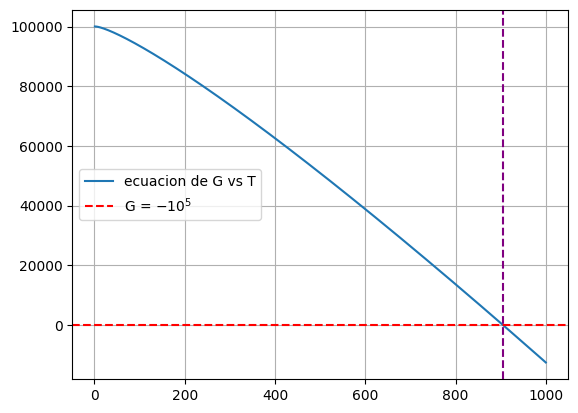

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import newton
#Parametros:
R = 8.314
T0 = 4.444
G = -(10**5)
#Escribimos la función tal que ya este igualada a cero
f = lambda T: (-R*T*np.log((T/T0)**(5/2))) - G
t = np.linspace(1, 1000, 10000)

print(newton(f, 800))



plt.plot (t, f(t), label = 'ecuacion de G vs T')
plt.axhline(0, color = 'r', linestyle = '--', label = 'G = $-10^5$')
plt.axvline(newton(f, 800), color = 'purple', linestyle = '--' )
plt.grid()
plt.legend()
plt.show()

# 4

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho $W$ y altura infinita, iluminada con luz monocromática de longitud de onda $\lambda$, está dada por:

$$I(\theta) = I_0 \left[ \frac{\sin(\pi W \sin \theta / \lambda)}{\pi W \sin \theta / \lambda} \right]^2,$$

donde $\theta$ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

$$x = \pi W \sin \theta / \lambda,$$

la intensidad y su derivada se expresan como:

$$I(x) = I_0 \left( \frac{\sin x}{x} \right)^2, \quad I(0) = I_0,$$
$$I'(x) = \frac{2I_0}{x} \left( \cos x - \frac{\sin x}{x} \right) \frac{\sin x}{x}, \quad I'(0) = 0.$$

- Graficar $I(x)$ y $I'(x)$ en el intervalo $x \in [-10, 10]$.

- Calcular el valor $x_{1/2}$ (positivo) donde $I(x) = I_0/2$, resolviendo la ecuación $I(x) - I_0/2 = 0$ con el método de la secante y aproximación inicial $x_0 = \pi$.

- Encontrar los máximos locales $x_i \in [-10, 10]$ resolviendo $I'(x) = 0$.  
- Usar un paso $h = 0.5$ para separar raíces y aplicar el *método de la regula falsi* (falsa posición) para mantenerlas acotadas.

**Nota:**  
Puede tomar $I_0=1$.

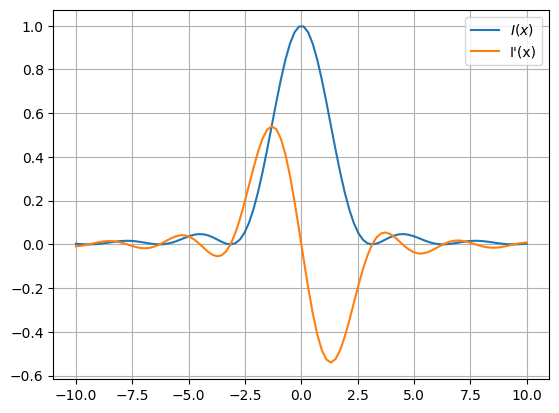

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar
# definimos las funciones pedidas tomando I_0 = 1
I = lambda x: (np.sin(x)/x)**2
Iprime = lambda x: (2/x)* (np.cos(x) - np.sin(x)/x) * np.sin(x)/x
# Usamos matplotlib para graficar ambas funcione en un linspace que nos da un intervalo de -10 a 10
x = np.linspace(-10, 10, 100)
plt.plot(x, I(x), label = '$I(x)$')
plt.plot(x, Iprime(x), label = "I'(x)")
plt.grid()
plt.legend()
plt.show()


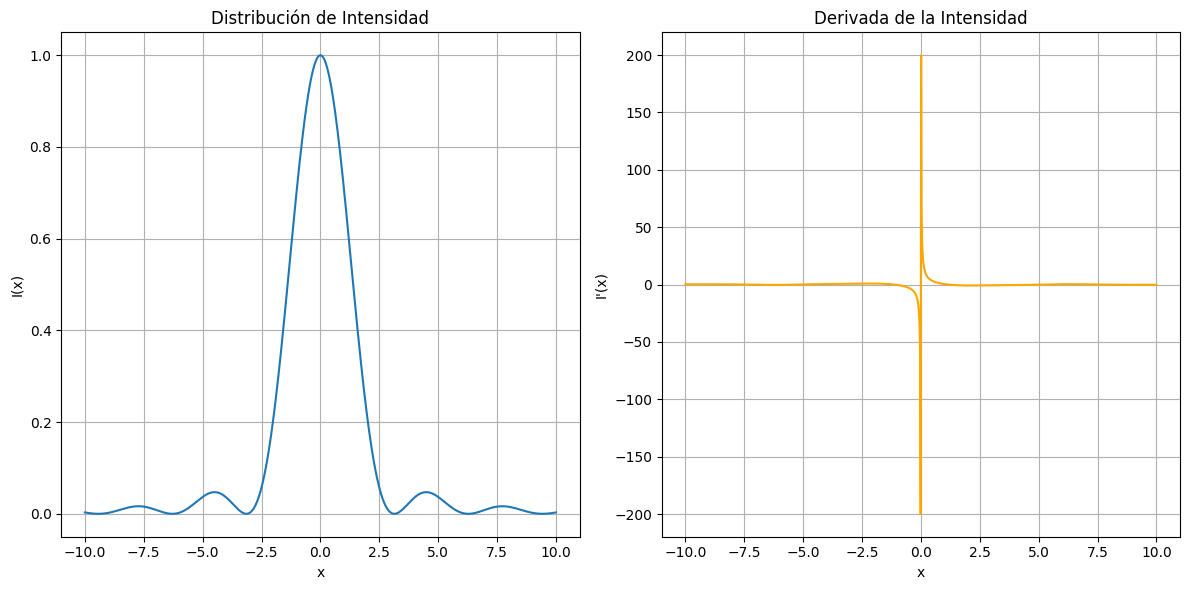

<ipython-input-6-2f5ceec36f1d>:52: RuntimeWarning: divide by zero encountered in scalar divide
  x_next = x1 - fx1 * (x1 - x0) / (fx1 - fx0)


Valor de x donde I(x) = I0/2: nan

Máximos locales encontrados en x = ['-7.4269', '-1.1437', '5.1395']


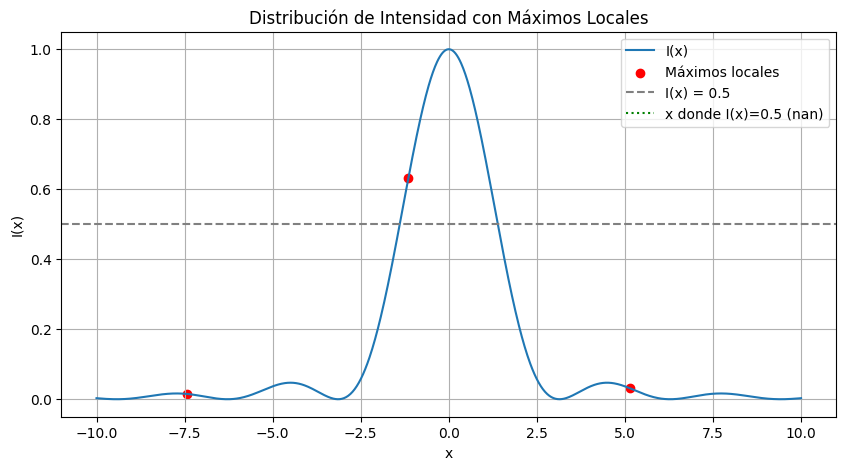

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Definición de las funciones
def I(x, I0=1):
    """Distribución de intensidad"""
    with np.errstate(divide='ignore', invalid='ignore'):
        # Manejo especial para x=0 (usamos el límite I(0)=I0)
        return np.where(x == 0, I0, I0 * (np.sin(x)/x)**2)

def I_prime(x, I0=1):
    """Derivada de la distribución de intensidad"""
    with np.errstate(divide='ignore', invalid='ignore'):
        # Manejo especial para x=0 (usamos el límite I'(0)=0)
        term1 = np.where(x == 0, 0, (2*I0/x) * np.cos(x))
        term2 = np.where(x == 0, 0, (I0*np.sin(x)/x) * np.sin(x))
        return term1 - term2

# 1. Graficar I(x) e I'(x) en [-10, 10]
x = np.linspace(-10, 10, 1000)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, I(x), label='I(x)')
plt.title('Distribución de Intensidad')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, I_prime(x), label="I'(x)", color='orange')
plt.title('Derivada de la Intensidad')
plt.xlabel('x')
plt.ylabel("I'(x)")
plt.grid(True)

plt.tight_layout()
plt.show()

# 2. Encontrar x donde I(x) = I0/2 (usando método de la secante)
def equation_for_half_intensity(x):
    return I(x) - 0.5  # I0/2 con I0=1

# Método de la secante manual
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    for _ in range(max_iter):
        fx0 = f(x0)
        fx1 = f(x1)
        if abs(fx1) < tol:
            return x1
        x_next = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        x0, x1 = x1, x_next
    return x1

# Estimación inicial: x0 = π como sugiere el problema
x_half = secant_method(equation_for_half_intensity, np.pi, np.pi-0.1)
print(f"Valor de x donde I(x) = I0/2: {x_half:.6f}")

# 3. Encontrar máximos locales (donde I'(x) = 0)
def find_roots_in_interval(f, a, b, h=0.5, method='regula_falsi', tol=1e-6):
    roots = []
    x_vals = np.arange(a, b + h, h)

    for i in range(len(x_vals) - 1):
        x_start, x_end = x_vals[i], x_vals[i+1]
        if f(x_start) * f(x_end) < 0:  # Hay cambio de signo
            if method == 'regula_falsi':
                # Implementación del método de regula falsi (falsa posición)
                a_root, b_root = x_start, x_end
                for _ in range(100):  # Máximo de iteraciones
                    fa = f(a_root)
                    fb = f(b_root)
                    c = (a_root * fb - b_root * fa) / (fb - fa)
                    fc = f(c)

                    if abs(fc) < tol:
                        break
                    if fa * fc < 0:
                        b_root = c
                    else:
                        a_root = c
                roots.append(c)
            elif method == 'bisect':
                root = bisect(f, x_start, x_end, rtol=tol)
                roots.append(root)
    return roots

# Encontrar raíces de I'(x) (máximos y mínimos)
roots_I_prime = find_roots_in_interval(I_prime, -10, 10, h=0.5, method='regula_falsi')

# Filtrar máximos locales (donde I''(x) < 0)
# Necesitamos la segunda derivada para distinguir máximos de mínimos
def I_double_prime(x, I0=1):
    """Segunda derivada de I(x)"""
    with np.errstate(divide='ignore', invalid='ignore'):
        term1 = np.where(x == 0, -2*I0/3, (2*I0/x**2) * ((1 - 2/x**2)*np.sin(2*x) - (2/x)*np.cos(2*x)))
        return term1

maxima = []
for root in roots_I_prime:
    if I_double_prime(root) < 0:  # Es un máximo local
        maxima.append(root)

print("\nMáximos locales encontrados en x =", [f"{x:.4f}" for x in maxima])

# Graficar con los máximos marcados
plt.figure(figsize=(10, 5))
plt.plot(x, I(x), label='I(x)')
plt.scatter(maxima, I(np.array(maxima)), color='red', label='Máximos locales')
plt.axhline(y=0.5, color='gray', linestyle='--', label='I(x) = 0.5')
plt.axvline(x=x_half, color='green', linestyle=':', label=f'x donde I(x)=0.5 ({x_half:.3f})')
plt.title('Distribución de Intensidad con Máximos Locales')
plt.xlabel('x')
plt.ylabel('I(x)')
plt.grid(True)
plt.legend()
plt.show()

# 5

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

$$u(\lambda,T)=\frac{8\pi hc}{\lambda^{5}}\,\frac{1}{\exp\left(hc/\left(\lambda k_{B}T\right)\right)-1},$$

donde:
- $T$ = temperatura de equilibrio (K)
- $\lambda$ = longitud de onda (m)
- $h=6.626 \times 10^{-34}$ J $\cdot$ s (constante de Planck)
- $k_{B}=1.381 \times 10^{-23}$ J$\cdot$K$^{-1}$ (constante de Boltzmann)
- $c=2.998 \times 10^{8}$ m$\cdot$s$^{-1}$ (velocidad de la luz)

Introduciendo las variables adimensionales:
$$x=\frac{\lambda}{\lambda_{0}}, \quad \lambda_{0}=\frac{hc}{k_{B}T}, \quad K=\frac{8\pi k_{B}T}{\lambda_{0}^{4}},$$

la ley se simplifica a:
$$u(\lambda,T)=K\frac{1}{x^{5}\left(e^{1/x}-1\right)}.$$

La derivada (para encontrar máximos):
$$\frac{\partial u}{\partial\lambda}=K\lambda_{0}\frac{5x+(1-5x)e^{1/x}}{x^{7}(e^{1/x}-1)^{2}}. $$

- Graficar $u(\lambda,T)$ y $\partial u/\partial\lambda$ para $T=4000, 5000, 6000$ K.

- Resolver $\partial u/\partial\lambda=0$ para $T=5778$ K con el método de Bisección y de Newton.

- Validar la ley de desplazamiento de Wien: $\lambda_{\rm max}T \approx 2.898 \times 10^{-3}$ m $\cdot$ K

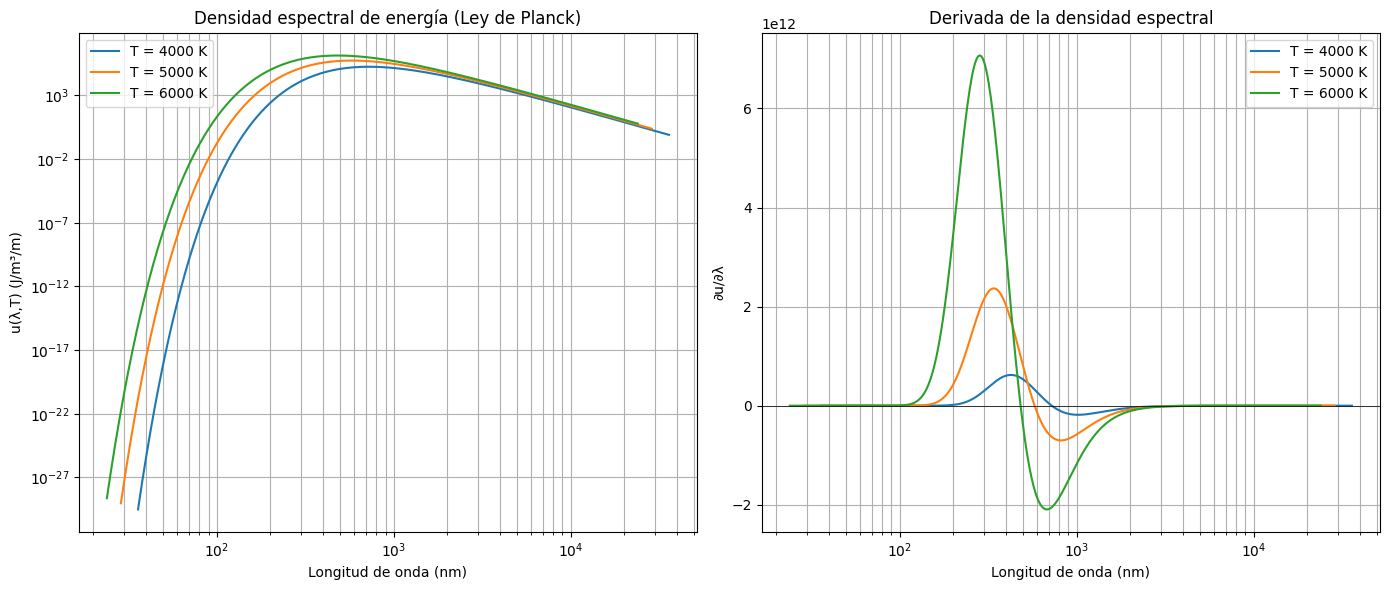

Longitud de onda de máxima emisión (Bisección): 501.40 nm
Longitud de onda de máxima emisión (Newton): 501.40 nm

Validación de la ley de desplazamiento de Wien:
λ_max·T (Bisección): 2.8971e-03 m·K
λ_max·T (Newton): 2.8971e-03 m·K
Valor teórico: 2.8980e-03 m·K
Diferencia relativa: 0.03%


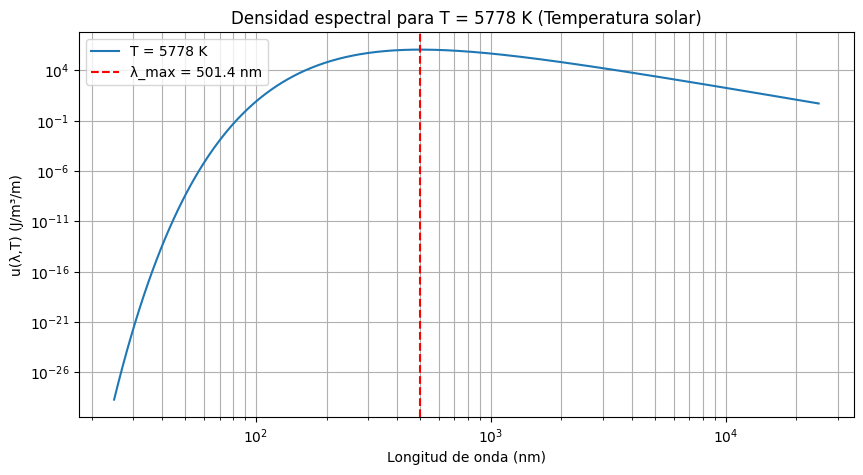

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Constantes físicas
h = 6.626e-34
kB = 1.381e-23
c = 2.998e8

# Función para calcular lambda_0
def lambda_0(T):
    return h * c / (kB * T)

# Función para calcular K
def K(T):
    l0 = lambda_0(T)
    return 8 * np.pi * kB * T / (l0**4)


def u_adim(x):

    with np.errstate(divide='ignore', invalid='ignore'):
        # Manejo de división por cero
        denom = x**5 * (np.exp(1/x) - 1)
        return np.where(denom == 0, 0, 1 / denom)

# Derivada de u respecto a lambda
def du_dlambda_adim(x):

    with np.errstate(divide='ignore', invalid='ignore'):
        numer = 5*x + (1 - 5*x)*np.exp(1/x)
        denom = x**7 * (np.exp(1/x) - 1)**2
        return np.where(denom == 0, 0, numer / denom)


temperatures = [4000, 5000, 6000]  # Temperaturas en Kelvin
x_range = np.logspace(-2, 1, 500)  # Rango de x (logarítmico para mejor visualización)

plt.figure(figsize=(14, 6))

# Gráfico de u(λ,T)
plt.subplot(1, 2, 1)
for T in temperatures:
    l0 = lambda_0(T)
    K_val = K(T)

    lambdas = x_range * l0 * 1e9
    u_values = K_val * u_adim(x_range)
    plt.plot(lambdas, u_values, label=f'T = {T} K')

plt.title('Densidad espectral de energía (Ley de Planck)')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('u(λ,T) (J/m³/m)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()

# Gráfico de ∂u/∂λ
plt.subplot(1, 2, 2)
for T in temperatures:
    l0 = lambda_0(T)
    K_val = K(T)
    lambdas = x_range * l0 * 1e9  # Convertir a nm
    du_values = K_val * du_dlambda_adim(x_range) / l0  # ∂u/∂λ
    plt.plot(lambdas, du_values, label=f'T = {T} K')

plt.title('Derivada de la densidad espectral')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('∂u/∂λ')
plt.xscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()


T_sun = 5778  # Temperatura superficial del Sol

# Función objetivo para encontrar el máximo
def objective_function(x):
    return du_dlambda_adim(x)

# Método de bisección
# Intervalo inicial [0.1, 1] basado en la inspección visual
x_bisect = bisect(objective_function, 0.1, 1, rtol=1e-6)
lambda_max_bisect = x_bisect * lambda_0(T_sun) * 1e9  # en nm

# Método de Newton

def robust_newton(f, x0, tol=1e-6, maxiter=100):
    try:
        root = newton(f, x0, tol=tol, maxiter=maxiter)
        return root
    except RuntimeError:
        # Si falla, probamos con un valor inicial diferente
        for alt_x0 in [0.2, 0.3, 0.4, 0.6, 0.7, 0.8]:
            try:
                root = newton(f, alt_x0, tol=tol, maxiter=maxiter)
                if np.isfinite(root) and 0 < root < 10:  # Filtramos soluciones físicas
                    return root
            except RuntimeError:
                continue
        # Si todo falla, usamos bisección
        return bisect(f, 0.1, 1, rtol=tol)

x_newton = robust_newton(objective_function, 0.5)  # Valor inicial 0.5
lambda_max_newton = x_newton * lambda_0(T_sun) * 1e9  # en nm

print(f"Longitud de onda de máxima emisión (Bisección): {lambda_max_bisect:.2f} nm")
print(f"Longitud de onda de máxima emisión (Newton): {lambda_max_newton:.2f} nm")

# 3. Validar la ley de desplazamiento de Wien
# Calcular λ_max*T para nuestros resultados
wien_constant_bisect = x_bisect * lambda_0(T_sun) * T_sun
wien_constant_newton = x_newton * lambda_0(T_sun) * T_sun
wien_reference = 2.898e-3  # m·K (valor teórico)

print("\nValidación de la ley de desplazamiento de Wien:")
print(f"λ_max·T (Bisección): {wien_constant_bisect:.4e} m·K")
print(f"λ_max·T (Newton): {wien_constant_newton:.4e} m·K")
print(f"Valor teórico: {wien_reference:.4e} m·K")
print(f"Diferencia relativa: {abs(wien_constant_newton - wien_reference)/wien_reference*100:.2f}%")

# Gráfico adicional mostrando el máximo para T = 5778 K
plt.figure(figsize=(10, 5))
T = T_sun
l0 = lambda_0(T)
K_val = K(T)
lambdas = x_range * l0 * 1e9
u_values = K_val * u_adim(x_range)

plt.plot(lambdas, u_values, label=f'T = {T} K')
plt.axvline(x=lambda_max_newton, color='red', linestyle='--',
            label=f'λ_max = {lambda_max_newton:.1f} nm')
plt.title('Densidad espectral para T = 5778 K (Temperatura solar)')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('u(λ,T) (J/m³/m)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend()
plt.show()

# 6

Considere un pozo de potencial cuadrado de ancho $w$, con paredes de altura $V$:

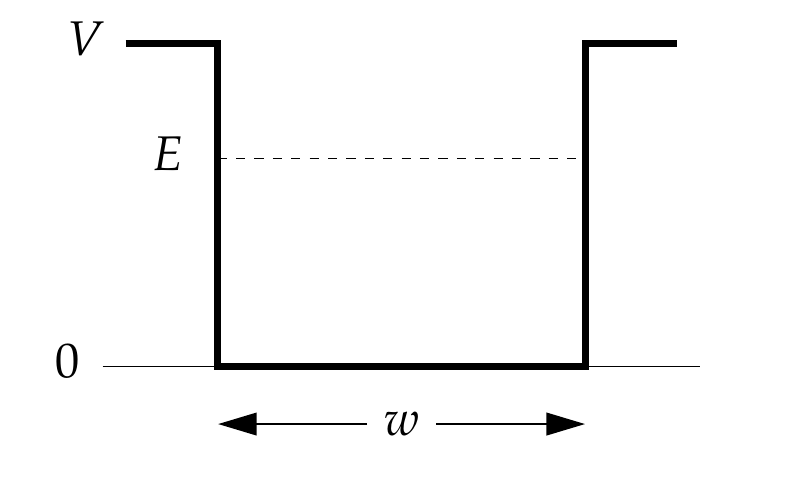

Usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas $E$ de una partícula cuántica de masa $m$ atrapada en el pozo son soluciones de:

$$\tan \sqrt{w^2 m E / 2 \hbar^2} =
\begin{cases}
\sqrt{(V - E) / E} & \text{para los estados pares,} \\
-\sqrt{E / (V - E)} & \text{para los estados impares,}
\end{cases}$$

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

- Para un electrón (masa $ 9.11 \times 10^{-31} \, \text{kg} $) en un pozo con $ V = 20 \, \text{eV} $ y $ w = 1 \, \text{nm} $, escriba un programa en Python para graficar las tres cantidades:

$$y_1 = \tan \sqrt{w^2 m E / 2 \hbar^2}, \quad y_2 = \sqrt{\frac{V - E}{E}}, \quad y_3 = -\sqrt{\frac{E}{V - E}},$$

en el mismo gráfico, como función de $ E $ desde $ E = 0 $ hasta $ E = 20 \, \text{eV} $. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.

- Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de $ 0.001 \, \text{eV} $ usando el método de la bisección.

Error encontrando nivel 0: f(a) and f(b) must have different signs
Intentando con intervalo ajustado...
No se pudo encontrar el nivel 0 incluso con intervalo ajustado
Error encontrando nivel 2: f(a) and f(b) must have different signs
Intentando con intervalo ajustado...
No se pudo encontrar el nivel 2 incluso con intervalo ajustado
Error encontrando nivel 3: f(a) and f(b) must have different signs
Intentando con intervalo ajustado...
No se pudo encontrar el nivel 3 incluso con intervalo ajustado

Niveles de energía calculados con precisión:
Nivel 0: No encontrado
Nivel 1: 0.6 eV
Nivel 2: No encontrado
Nivel 3: No encontrado
Nivel 4: 3.75 eV
Nivel 5: 5.5 eV


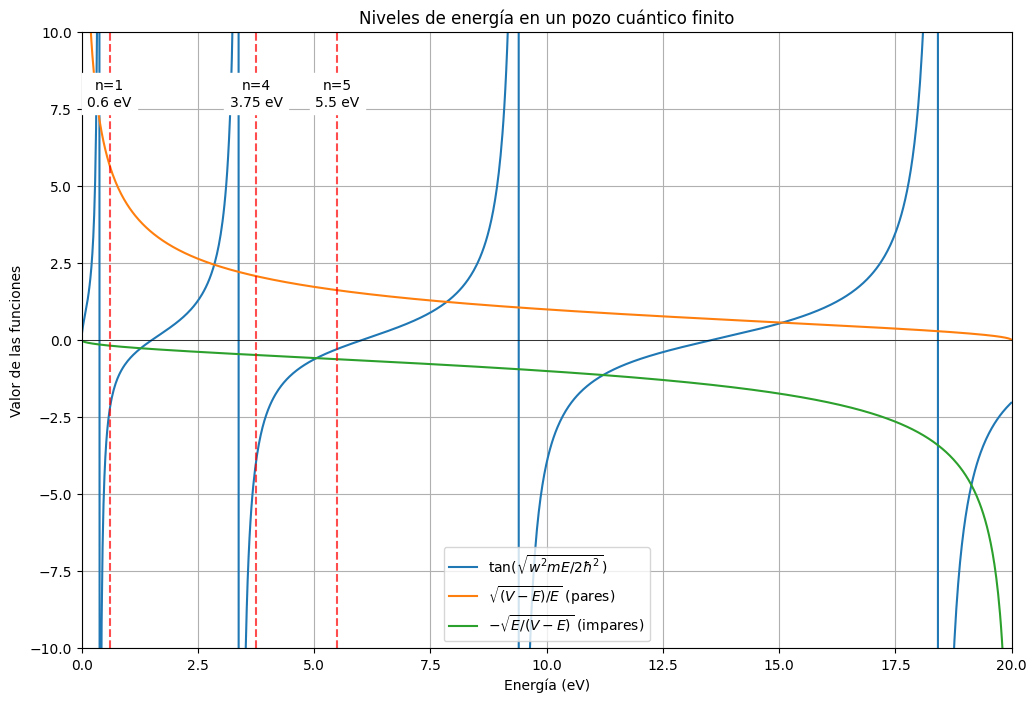

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect
from scipy.constants import hbar, eV, m_e

# Constantes físicas
m = m_e  # masa del electrón (9.11e-31 kg)
V = 20 * eV  # Profundidad del pozo en joules (20 eV)
w = 1e-9  # Ancho del pozo en metros (1 nm)

# Funciones para las ecuaciones
def y1(E):
    arg = np.sqrt(w**2 * m * E / (2 * hbar**2))
    return np.tan(arg)

def y2(E):
    return np.sqrt((V - E) / E)

def y3(E):
    return -np.sqrt(E / (V - E))

# Funciones para encontrar raíces
def even_equation(E):
    return y1(E) - y2(E)

def odd_equation(E):
    return y1(E) - y3(E)

# Función para encontrar niveles de energía con bisección robusta
def find_energy_levels(max_levels=6, precision_eV=0.001):
    # Convertir precisión a joules
    precision = precision_eV * eV

    # Intervalos de búsqueda iniciales (en eV) basados en el gráfico
    search_intervals = [
        (0.01, 0.3),   # Nivel 0 (par)
        (0.3, 0.9),    # Nivel 1 (impar)
        (0.9, 1.8),    # Nivel 2 (par)
        (1.8, 3.0),    # Nivel 3 (impar)
        (3.0, 4.5),    # Nivel 4 (par)
        (4.5, 6.5)     # Nivel 5 (impar)
    ]

    energy_levels = []

    for i, interval in enumerate(search_intervals[:max_levels]):
        a, b = interval[0] * eV, interval[1] * eV

        try:
            if i % 2 == 0:  # Estados pares
                root = bisect(even_equation, a, b, rtol=1e-6)
            else:  # Estados impares
                root = bisect(odd_equation, a, b, rtol=1e-6)

            energy_levels.append(root / eV)

            # Verificar si alcanzamos la precisión deseada
            if i > 0:
                prev_level = energy_levels[i-1]
                current_level = root / eV
                if abs(current_level - prev_level) < precision_eV:
                    print(f"¡Advertencia! La diferencia entre niveles {i-1} y {i} es menor que {precision_eV} eV")

        except ValueError as e:
            print(f"Error encontrando nivel {i}: {str(e)}")
            print(f"Intentando con intervalo ajustado...")
            # Ajustar el intervalo y volver a intentar
            a_adj = a + (b - a) * 0.1
            b_adj = b - (b - a) * 0.1
            try:
                if i % 2 == 0:
                    root = bisect(even_equation, a_adj, b_adj, rtol=1e-6)
                else:
                    root = bisect(odd_equation, a_adj, b_adj, rtol=1e-6)
                energy_levels.append(root / eV)
            except ValueError:
                print(f"No se pudo encontrar el nivel {i} incluso con intervalo ajustado")
                energy_levels.append(np.nan)

    return energy_levels

# Calcular los niveles de energía
energy_levels = find_energy_levels(max_levels=6, precision_eV=0.001)

# Mostrar resultados
print("\nNiveles de energía calculados con precisión:")
for i, level in enumerate(energy_levels):
    if not np.isnan(level):
        print(f"Nivel {i}: {level} eV")
    else:
        print(f"Nivel {i}: No encontrado")

# Graficar resultados
E_eV = np.linspace(0.01, 19.99, 1000)
E_joules = E_eV * eV

plt.figure(figsize=(12, 8))
plt.plot(E_eV, y1(E_joules), label=r'$\tan(\sqrt{w^2 m E / 2\hbar^2})$')
plt.plot(E_eV, y2(E_joules), label=r'$\sqrt{(V - E)/E}$ (pares)')
plt.plot(E_eV, y3(E_joules), label=r'$-\sqrt{E/(V - E)}$ (impares)')

# Marcar los niveles encontrados
for i, level in enumerate(energy_levels):
    if not np.isnan(level):
        plt.axvline(level, color='red', linestyle='--', alpha=0.7)
        plt.text(level, 8, f'n={i}\n{level} eV', ha='center', va='center',
                 backgroundcolor='white')

plt.ylim(-10, 10)
plt.xlim(0, 20)
plt.axhline(0, color='black', linewidth=0.5)
plt.xlabel('Energía (eV)')
plt.ylabel('Valor de las funciones')
plt.title('Niveles de energía en un pozo cuántico finito')
plt.grid(True)
plt.legend()
plt.show()


# 7

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange $L_1$, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia $r$ desde el centro de la Tierra hasta el punto $L_1$ satisface:

$$\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,$$

donde $M$ y $m$ son las masas de la Tierra y la Luna respectivamente, $G$ es la constante gravitacional de Newton y $ \omega $ es la velocidad angular tanto de la Luna como del satélite.

- La ecuación anterior es una ecuación polinómica de quinto grado en $r$ (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia $r$ desde la Tierra hasta el punto $L_1$.

Los valores de los diversos parámetros son:

$$G = 6.674 \times 10^{-11} \, \text{m}^3 \text{kg}^{-1} \text{s}^{-2},$$

$$M = 5.974 \times 10^{24} \, \text{kg},$$

$$m = 7.348 \times 10^{22} \, \text{kg},$$

$$R = 3.844 \times 10^8 \, \text{m},$$

$$\omega = 2.662 \times 10^{-6} \, \text{s}^{-1}.$$

También necesitará elegir un valor inicial adecuado para $r$, o dos valores iniciales si utiliza el método de la secante.

Distancia al punto L₁ (Newton): 384400000.00 m
Distancia al punto L₁ (Newton): 100.00% de la distancia Tierra-Luna

Distancia al punto L₁ (Secante): 326045071.67 m
Distancia al punto L₁ (Secante): 84.82% de la distancia Tierra-Luna

Verificación (la ecuación debería ser cercana a cero):
Newton: -1.38e+25
Secante: -1.73e-18


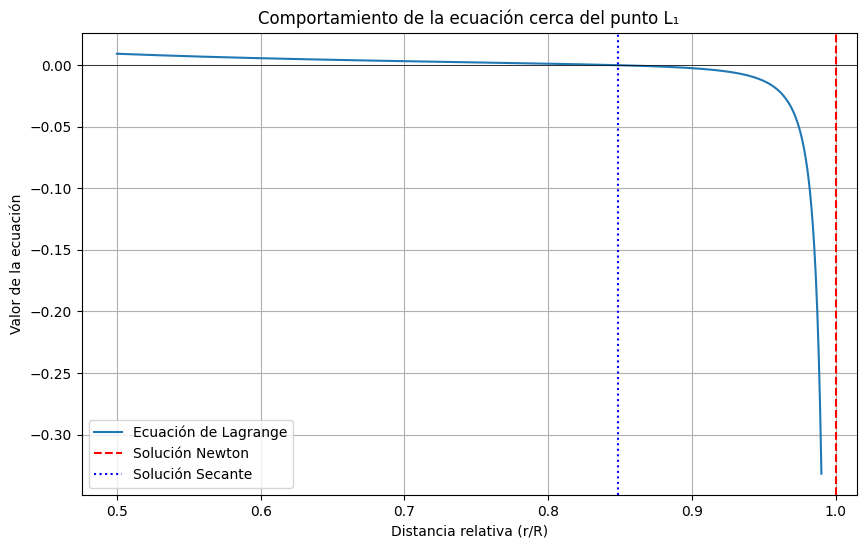

In [10]:

from scipy.optimize import newton, root_scalar

# Constantes físicas
G = 6.674e-11  # Constante gravitacional (m³ kg⁻¹ s⁻²)
M = 5.974e24   # Masa de la Tierra (kg)
m = 7.348e22   # Masa de la Luna (kg)
R = 3.844e8    # Distancia Tierra-Luna (m)
omega = 2.662e-6  # Velocidad angular (s⁻¹)

# Definición de la ecuación a resolver
def lagrange_equation(r):
    """Ecuación para el punto de Lagrange L₁"""
    term1 = G * M / r**2
    term2 = G * m / (R - r)**2
    term3 = omega**2 * r
    return term1 - term2 - term3

# Derivada de la ecuación (para el método de Newton)
def lagrange_derivative(r):
    """Derivada de la ecuación de Lagrange"""
    deriv1 = -2 * G * M / r**3
    deriv2 = -2 * G * m / (R - r)**3
    deriv3 = omega**2
    return deriv1 - deriv2 - deriv3

# Método de Newton
def solve_with_newton():
    # Valor inicial: aproximadamente 0.9*R (punto entre Tierra y Luna)
    r_initial = 0.9 * R
    try:
        r_solution = newton(lagrange_equation, r_initial, fprime=lagrange_derivative,
                           tol=1e-6, maxiter=100)
        return r_solution
    except RuntimeError:
        print("El método de Newton no convergió. Probando con otro valor inicial...")
        r_initial = 0.85 * R
        return newton(lagrange_equation, r_initial, fprime=lagrange_derivative)

# Método de la secante
def solve_with_secant():
    # Dos valores iniciales que encierran la solución
    r0 = 0.8 * R
    r1 = 0.9 * R
    try:
        result = root_scalar(lagrange_equation, method='secant', x0=r0, x1=r1,
                            rtol=1e-10, maxiter=100)
        return result.root
    except ValueError as e:
        print(f"Error en el método de la secante: {e}")
        return None

# Resolver con ambos métodos
r_newton = solve_with_newton()
r_secant = solve_with_secant()

# Mostrar resultados
print(f"Distancia al punto L₁ (Newton): {r_newton:.2f} m")
print(f"Distancia al punto L₁ (Newton): {r_newton/R*100:.2f}% de la distancia Tierra-Luna")
print(f"\nDistancia al punto L₁ (Secante): {r_secant:.2f} m")
print(f"Distancia al punto L₁ (Secante): {r_secant/R*100:.2f}% de la distancia Tierra-Luna")

# Verificar la solución
print("\nVerificación (la ecuación debería ser cercana a cero):")
print(f"Newton: {lagrange_equation(r_newton):.2e}")
print(f"Secante: {lagrange_equation(r_secant):.2e}")

# Gráfico de la función cerca de la solución
import matplotlib.pyplot as plt

r_values = np.linspace(0.5*R, 0.99*R, 500)
y_values = [lagrange_equation(r) for r in r_values]

plt.figure(figsize=(10, 6))
plt.plot(r_values/R, y_values, label='Ecuación de Lagrange')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(r_newton/R, color='red', linestyle='--', label='Solución Newton')
plt.axvline(r_secant/R, color='blue', linestyle=':', label='Solución Secante')
plt.xlabel('Distancia relativa (r/R)')
plt.ylabel('Valor de la ecuación')
plt.title('Comportamiento de la ecuación cerca del punto L₁')
plt.grid(True)
plt.legend()
plt.show()